In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url='https://raw.githubusercontent.com/emanuelssergio/challenger_telecon_1/refs/heads/main/TelecomX_Data.json'
df=pd.read_json(url)
df.shape

(7267, 6)

In [3]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
df = pd.json_normalize(df.to_dict(orient='records'))
df.columns


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [5]:
# Get unique values from the 'Churn' column
unicos = df['internet.OnlineSecurity'].unique()
print(unicos)

['No' 'Yes' 'No internet service']


In [6]:
df['customer.tenure'] = df['customer.tenure'].astype(int)

In [7]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [8]:
df['account.Charges.Total'].head()

,account.Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40


In [9]:
df['account.Charges.diary']=df['account.Charges.Monthly']/30

In [10]:
df['account.Charges.diary']

,account.Charges.diary
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [12]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['customer.Partner'] = df['customer.Partner'].replace({'Yes': 1, 'No': 0})
df['customer.Dependents'] = df['customer.Dependents'].replace({'Yes': 1, 'No': 0})
df['phone.PhoneService'] = df['phone.PhoneService'].replace({'Yes': 1, 'No': 0})
df['phone.MultipleLines'] = df['phone.MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 2})
df['internet.OnlineSecurity'] = df['internet.OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['internet.OnlineBackup'] = df['internet.OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['internet.DeviceProtection'] = df['internet.DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['internet.TechSupport'] = df['internet.TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['internet.StreamingTV'] = df['internet.StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['internet.StreamingMovies'] = df['internet.StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['account.PaperlessBilling']=df['account.PaperlessBilling'].replace({'Yes': 1, 'No': 0})


/tmp/ipython-input-1448155921.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['customer.Partner'] = df['customer.Partner'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-1448155921.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['customer.Dependents'] = df['customer.Dependents'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-1448155921.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=F

In [13]:
df.shape

(7267, 22)

In [14]:
df.describe()

,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,account.Charges.diary
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.616348,0.721068,0.779689,0.777900,0.724646,0.819045,0.822623,0.593230,64.720098,2280.634213,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.656583,0.797706,0.779086,0.779726,0.796705,0.763812,0.762307,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,118.750000,8684.800000,3.958333


In [15]:
ex_cliente=df.query('Churn==1')
ex_cliente=ex_cliente.reset_index(drop=True)
ex_cliente.shape

(1869, 22)

In [16]:
clientes_atuais=df.query('Churn==0')
clientes_atuais=clientes_atuais.reset_index(drop=True)
clientes_atuais.shape

(5174, 22)

In [17]:
clientes_atuais.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.diary
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0013-MHZWF,0,Female,0,0,1,9,1,0,DSL,...,0,1,1,1,Month-to-month,1,Credit card (automatic),69.40,571.45,2.313333
3,0013-SMEOE,0,Female,1,1,0,71,1,0,Fiber optic,...,1,1,1,1,Two year,1,Bank transfer (automatic),109.70,7904.25,3.656667
4,0014-BMAQU,0,Male,0,1,0,63,1,1,Fiber optic,...,0,1,0,0,Two year,1,Credit card (automatic),84.65,5377.80,2.821667


##ANALISE DOS CLIENTES Q EVADIRÃO

In [18]:
ex_cliente.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.diary
0,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
1,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
2,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667
3,0022-TCJCI,1,Male,1,0,0,45,1,0,DSL,...,1,0,0,1,One year,0,Credit card (automatic),62.7,2791.50,2.090000
4,0023-HGHWL,1,Male,1,0,0,1,0,2,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,25.1,25.10,0.836667


In [19]:
ex_cliente.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total',
       'account.Charges.diary'],
      dtype='object')

In [20]:
ex_cliente['account.Charges.diary'].describe()

,account.Charges.diary
count,1869.000000
mean,2.481378
std,0.822202
min,0.628333
25%,1.871667
50%,2.655000
75%,3.140000
max,3.945000


In [21]:
ex_cliente['account.Charges.Total'].describe()

,account.Charges.Total
count,1869.000000
mean,1531.796094
std,1890.822994
min,18.850000
25%,134.500000
50%,703.550000
75%,2331.300000
max,8684.800000


In [22]:
ex_cliente['account.Charges.Monthly'].describe()

,account.Charges.Monthly
count,1869.000000
mean,74.441332
std,24.666053
min,18.850000
25%,56.150000
50%,79.650000
75%,94.200000
max,118.350000


In [23]:
ex_cliente.groupby('account.PaymentMethod').size()#maioria usa pagamento eletronico

,0
account.PaymentMethod,
Bank transfer (automatic),258
Credit card (automatic),232
Electronic check,1071
Mailed check,308


In [24]:
ex_cliente.groupby('account.PaperlessBilling').size()#recebiaão a fatura online

,0
account.PaperlessBilling,
0,469
1,1400


In [25]:
ex_cliente.groupby('account.Contract').size()# maioria tinha o tipo de contrado mensal

,0
account.Contract,
Month-to-month,1655
One year,166
Two year,48


In [26]:
ex_cliente.groupby('internet.StreamingMovies').size()#numero equilibrado

,0
internet.StreamingMovies,
0,938
1,818
2,113


In [27]:
ex_cliente.groupby('internet.StreamingTV').size()#numero equilibrado

,0
internet.StreamingTV,
0,942
1,814
2,113


In [28]:
ex_cliente.groupby('internet.TechSupport').size()#maioria  n tinha   assinatura adicional de suporte técnico, menos tempo de espera

,0
internet.TechSupport,
0,1446
1,310
2,113


In [29]:
ex_cliente.groupby('internet.DeviceProtection').size()#maioria n tinha assinatura adicional de proteção no dispositivo

,0
internet.DeviceProtection,
0,1211
1,545
2,113


In [30]:
ex_cliente.groupby('internet.OnlineBackup').size()#maioria  n tinha assinatura adicional de backup online

,0
internet.OnlineBackup,
0,1233
1,523
2,113


In [31]:
ex_cliente.groupby('internet.OnlineSecurity').size()# a maioria n tinha serviçoes de assinatura adicional de segurança online

,0
internet.OnlineSecurity,
0,1461
1,295
2,113


In [32]:
ex_cliente.groupby('internet.InternetService').size()#maioria tinha o serviço de fibra opitica

,0
internet.InternetService,
DSL,459
Fiber optic,1297
No,113


In [33]:
ex_cliente.groupby('phone.MultipleLines').size()#dados equilibrados

,0
phone.MultipleLines,
0,849
1,850
2,170


In [34]:
ex_cliente.groupby('phone.PhoneService').size()# a amior parte tem assinatura de serviço telefônico


,0
phone.PhoneService,
0,170
1,1699


In [35]:
ex_cliente['customer.tenure'].describe()#rever

,customer.tenure
count,1869.000000
mean,17.979133
std,19.531123
min,1.000000
25%,2.000000
50%,10.000000
75%,29.000000
max,72.000000


In [36]:
ex_cliente.groupby('customer.Dependents').size()# os que deixarao a maior aprte n teinha dependentes

,0
customer.Dependents,
0,1543
1,326


In [37]:
ex_cliente.groupby('customer.Partner').size()#64% dos clietes q evatirao era solteiro

,0
customer.Partner,
0,1200
1,669


In [38]:
ex_cliente.groupby('customer.gender').size()#sexo n afeto a saida da clientela uma vez q esta perto de 50% entao n mostra q tem nenhuma relação

,0
customer.gender,
Female,939
Male,930


In [39]:
ex_cliente.groupby('customer.SeniorCitizen').size()# a maioria do q deixarao a empresa não tinha mais de 60 anos

,0
customer.SeniorCitizen,
0,1393
1,476


perfil evasão:

* SeniorCitizen; 75% dos n idosos evadirao a empresa,
* customer.Partner; 64% dos clietes q evatirao era solteiro,
* customer.Dependents;86%  os que deixarao a maior aprte n teinha dependentes;
* customer.tenure; em media os clientes q evadirão tinham em media 18 meses de  contrato, ate 75%dos clientes tinham ate 29 meses,
* phone.PhoneService;90% dos clientes tinham assinatura de serviço telefônico,
* internet.InternetService; 70% dos clientes tinham o serviço de fibra opitica,
* internet.OnlineSecurity; 78% N tinha serviçoes de assinatura adicional de segurança online,
* internet.OnlineBackup; 65% n tinha assinatura adicional de backup online,
* internet.DeviceProtection; 64% n tinha assinatura adicional de proteção no dispositivo,
* internet.TechSupport; 77% n tinha   assinatura adicional de suporte técnico, menos tempo de espera
* account.Contract;88%  maioria tinha o tipo de contrado mensal
* account.PaperlessBilling;74% recebiaão a fatura online
* account.PaymentMethod;57% maioria usa pagamento eletronico
* account.Charges.Monthly; em media os clientes q evadirão gastarão em media 74 reais por mes de contrato, ate 75% dos clientes gastarão 94 reais por mes de contrato,
* account.Charges.Total;em media os clientes q evadirão gastarão em media 1531 reais no tempo total de contrato, ate 75% dos clientes gastarão 2331 reais no tempo total de contratoo,desvio padrão alto
* account.Charges.diary:em media os clientes q evadirão gastarão em media 2.5 reais por dia de contrato, ate 75% dos clientes gastarão 3.1 reais por dia de contrato,










DADOS EQUILIBRADOS: N MOSTRAO TANTA RELEVANCIA NA ALANISE
internet.StreamingMovies,internet.StreamingTV,phone.MultipleLines,customer.gend

# CLIENTES REMANECENTES

In [40]:
clientes_atuais.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total',
       'account.Charges.diary'],
      dtype='object')

In [41]:
clientes_atuais['account.Charges.diary'].describe()#media os clientes q ficarao gastarão em media 2.0 reais por dia de contrato, ate 75% dos clientes gastarão 2.9 reais por dia de contrato,

,account.Charges.diary
count,5174.000000
mean,2.042171
std,1.036422
min,0.608333
25%,0.836667
50%,2.147500
75%,2.946667
max,3.958333


In [42]:
clientes_atuais['account.Charges.Total'].describe()#em media os clientes q evadirão gastarão em media 2555 reais no tempo total de contrato, ate 75% dos clientes gastarão 4264 reais no tempo total de contratoo,desvio padrão alto

,account.Charges.Total
count,5163.000000
mean,2555.344141
std,2329.456984
min,18.800000
25%,577.825000
50%,1683.600000
75%,4264.125000
max,8672.450000


In [43]:
clientes_atuais['account.Charges.Monthly'].describe()# em media os clientes q evadirão gastarão em media 61 reais por mes de contrato, ate 75% dos clientes gastarão 88 reais por mes de contrato,



,account.Charges.Monthly
count,5174.000000
mean,61.265124
std,31.092648
min,18.250000
25%,25.100000
50%,64.425000
75%,88.400000
max,118.750000


In [44]:
clientes_atuais.groupby('account.PaymentMethod').size()#metodos de pagamentos equilibrados

,0
account.PaymentMethod,
Bank transfer (automatic),1286
Credit card (automatic),1290
Electronic check,1294
Mailed check,1304


In [45]:
clientes_atuais.groupby('account.PaperlessBilling').size()#maioria receba fatura online mas em menor quantidade

,0
account.PaperlessBilling,
0,2403
1,2771


In [46]:
clientes_atuais.groupby('account.Contract').size()#maiorira tinha paga mes a mes, mas discrepancia n e tao grande com relação aos outros modolos

,0
account.Contract,
Month-to-month,2220
One year,1307
Two year,1647


In [47]:
clientes_atuais.groupby('internet.StreamingMovies').size()#dados equilibrados

,0
internet.StreamingMovies,
0,1847
1,1914
2,1413


In [48]:
clientes_atuais.groupby('internet.StreamingTV').size()#dados equilibrados

,0
internet.StreamingTV,
0,1868
1,1893
2,1413


In [49]:
clientes_atuais.groupby('internet.TechSupport').size()#dados equilibrados de assinatura adicional de suporte técnico

,0
internet.TechSupport,
0,2027
1,1734
2,1413


In [50]:
clientes_atuais.groupby('internet.DeviceProtection').size()#dados equilibrados proteção no dispositivo

,0
internet.DeviceProtection,
0,1884
1,1877
2,1413


In [51]:

clientes_atuais.groupby('internet.OnlineBackup').size()# por margem pequena mais a maior parte dos cliente possui backup online

,0
internet.OnlineBackup,
0,1855
1,1906
2,1413


In [52]:
clientes_atuais.groupby('internet.OnlineSecurity').size()#a maior parte  n tem assinatura digital, porem a discrepancia e muito menor com relação a outras modalidade,

,0
internet.OnlineSecurity,
0,2037
1,1724
2,1413


In [53]:
clientes_atuais.groupby('internet.InternetService').size()# a maioria tinha rede de internet, n se destacando nem fibraoptica, nem DLS, mas no geral grupo equilibrado

,0
internet.InternetService,
DSL,1962
Fiber optic,1799
No,1413


In [54]:
clientes_atuais.groupby('phone.MultipleLines').size()# n relevante

,0
phone.MultipleLines,
0,2541
1,2121
2,512


In [55]:
clientes_atuais.groupby('phone.PhoneService').size()# a maioria tinha serviço de telefone


,0
phone.PhoneService,
0,512
1,4662


In [56]:

clientes_atuais['customer.tenure'].describe()#em media os clientes q ficarao tinham em media 37 meses de contrato, ate 75%dos clientes tinham ate 61 meses, desvio padrao alto

,customer.tenure
count,5174.000000
mean,37.569965
std,24.113777
min,0.000000
25%,15.000000
50%,38.000000
75%,61.000000
max,72.000000


In [57]:
clientes_atuais.groupby('customer.Dependents').size()# a maioria n tem dependentes

,0
customer.Dependents,
0,3390
1,1784


In [58]:
clientes_atuais.groupby('customer.Partner').size() #n relevante

,0
customer.Partner,
0,2441
1,2733


In [59]:
clientes_atuais.groupby('customer.gender').size()# n mostra sexo n afeto a saida da clientela uma vez q esta perto de 50% entao n mostra q tem nenhuma relação

,0
customer.gender,
Female,2549
Male,2625


In [60]:
clientes_atuais.groupby('customer.SeniorCitizen').size()#marioria n e idosa

,0
customer.SeniorCitizen,
0,4508
1,666


* SeniorCitizen; 87% dos n idosos evadirao a empresa,

* customer.Dependents;65% os que deixarao a maior aprte n teinha dependentes;

* customer.tenure; #em media os clientes q ficarao tinham em media 37 meses de contrato, ate 75%dos clientes tinham ate 61 meses, desvio padrao alto

* phone.PhoneService;90% dos clientes tinham assinatura de serviço telefônico,

* internet.InternetService;# a maioria tinha rede de internet, n se destacando nem fibraoptica, nem DLS, mas no geral grupo equilibrado,

* internet.OnlineSecurity; #a maior parte  n tem assinatura digital, porem a discrepancia e muito menor com relação a outras modalidade,

* internet.OnlineBackup;  por margem pequena mais a maior parte dos cliente possui backup online

* internet.DeviceProtection; #dados equilibrados proteção no dispositivo

* internet.TechSupport;#dados equilibrados de assinatura adicional de suporte técnico

* account.Contract;#maiorira tinha paga mes a mes, mas discrepancia n e tao grande com relação aos outros modolos

* account.PaperlessBilling;metodos de pagamentos equilibrados

* account.PaymentMethod;metodos de pagamentos equilibrados

* account.Charges.Monthly; # em media os clientes q evadirão gastarão em media 61 reais por mes de contrato, ate 75% dos clientes gastarão 88 reais por mes de contrato,

* account.Charges.Total;#em media os clientes q evadirão gastarão em media 2555 reais no tempo total de contrato, ate 75% dos clientes gastarão 4264 reais no tempo total de contratoo,desvio padrão alto

* account.Charges.diary:#media os clientes q ficarao gastarão em media 2.0 reais por dia de contrato, ate 75% dos clientes gastarão 2.9 reais por dia de contrato,


#relevante
SeniorCitizen,Dependents,PhoneService,tenure
#não relevante
gender,Partner,MultipleLines,InternetService,StreamingMovies,StreamingMovies

# COMPARAÇÂO

#dados dos clientes
'customer.gender', 'customer.SeniorCitizen','customer.Partner', 'customer.Dependents', 'customer.tenure',


**Gernero**: n mostrou nenhuma variação, nos dois casos entre de clientes e ex clientes, nos dois casos ele se manterao em torno de 50%

**pessoas com mais de 65 anos**:n mostrou nenhuma variação, nos dois casos entre de clientes e ex clientes, se destacando que o grupo de clientes q ficarao na empresa tinham 10% em porcentagem de idosos do q o grupo em comparação ao grupo q saiu, mas n e muito relevante

**COMPANHEIROS**:clitens q evadirao eram em sua maioria solteiros enquanto os clientes quq continuarao com a empresa erao por uma margem pequena sua maioria casada

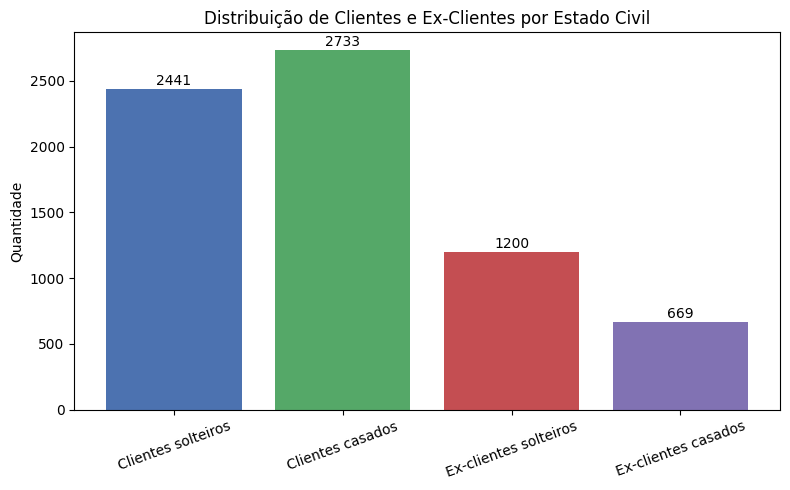

In [61]:
COMPANHEIROS = [
    "Clientes solteiros",
    "Clientes casados",
    "Ex-clientes solteiros",
    "Ex-clientes casados"
]
valores = [2441, 2733, 1200, 669]

# --- Gráfico de Barras ---
plt.figure(figsize=(8,5))
plt.bar(COMPANHEIROS, valores, color=['#4c72b0', '#55a868', '#c44e52', '#8172b3'])
plt.ylabel('Quantidade')
plt.title('Distribuição de Clientes e Ex-Clientes por Estado Civil')

# Rotular valores acima das barras
for i, valor in enumerate(valores):
    plt.text(i, valor + 30, str(valor), ha='center', fontsize=10)

plt.xticks(rotation=20)
plt.tight_layout()
plt.show()



**DEPENDENTES**:a maior parte dos clientes em gerla n tem filhos, porem os que evadirao da empressa essa porcentagem chega a ser de 86%, enquanto dos q ficarao e apenas 65%






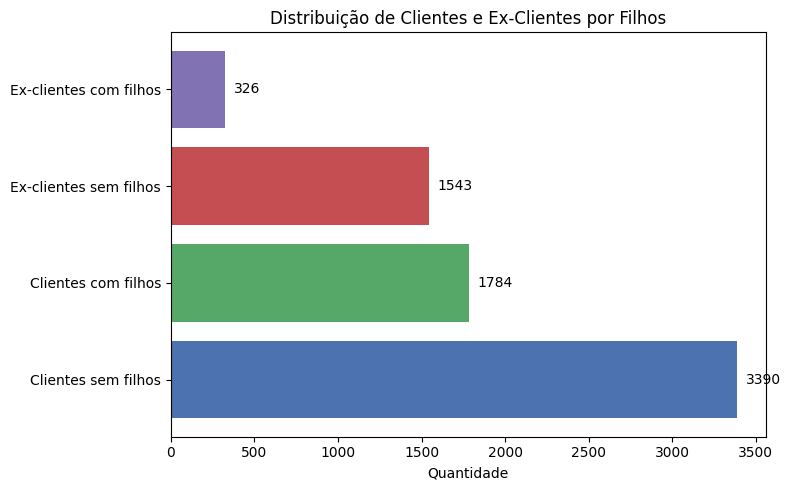

In [62]:
DEPENDENTES = [
    "Clientes sem filhos",
    "Clientes com filhos",
    "Ex-clientes sem filhos",
    "Ex-clientes com filhos"
]
valores = [3390, 1784, 1543, 326]

cores = ['#4c72b0', '#55a868', '#c44e52', '#8172b3']

plt.figure(figsize=(8,5))
plt.barh(DEPENDENTES, valores, color=cores)

# Adicionar valores no final das barras
for i, v in enumerate(valores):
    plt.text(v + 50, i, str(v), va='center', fontsize=10)

plt.xlabel('Quantidade')
plt.title('Distribuição de Clientes e Ex-Clientes por Filhos')
plt.tight_layout()
plt.show()

MESES DE CONTRATO: os clientes q evadirao tinham em meida 18 meses ja os clientes q ficarao tem uma media de 37 meses de contrato, vemos nos grafico abaixo que como a curva dos clientes q evadirao e muito mais ingrime, assim mostrando q eles tem em media muito menos meses de contrato q os clientes q ficarão

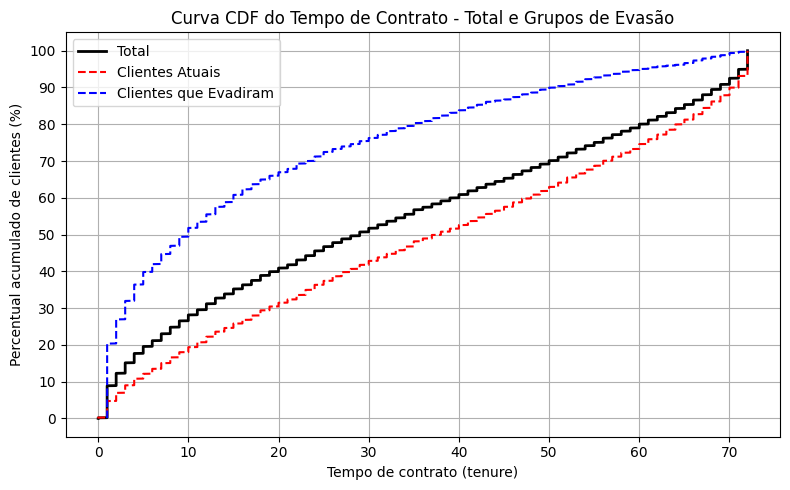

In [63]:
# Dados principais
dados_total = df['customer.tenure']

# Dados dos grupos (supondo que já existam esses DataFrames)
dados_evasao_1 = clientes_atuais['customer.tenure']
dados_evasao_2 = ex_cliente['customer.tenure']

# Função para calcular CDF (%)
def calcula_cdf(dados):
    valores = np.sort(dados)
    cdf = np.arange(1, len(valores)+1) / len(valores) * 100
    return valores, cdf

# Calcular CDFs
x_total, y_total = calcula_cdf(dados_total)
x_e1, y_e1 = calcula_cdf(dados_evasao_1)
x_e2, y_e2 = calcula_cdf(dados_evasao_2)

plt.figure(figsize=(8,5))
plt.plot(x_total, y_total, label='Total', color='black', linewidth=2)
plt.plot(x_e1, y_e1, label='Clientes Atuais', color='red', linestyle='--')
plt.plot(x_e2, y_e2, label='Clientes que Evadiram', color='blue', linestyle='--')

plt.xlabel('Tempo de contrato (tenure)')
plt.ylabel('Percentual acumulado de clientes (%)')
plt.title('Curva CDF do Tempo de Contrato - Total e Grupos de Evasão')
plt.yticks(np.arange(0, 110, 10))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**ASSINATURAS, de 1 ou mais linhas**: foi desconsiderada pois os dados sao parecidos

**SERVIÇOES DE ASSINATURA**:
No geral os clientes q ficarão tinhao muito mesno serviçoes de assinatura, que os que evadirao, analisando os dados podemos ver q a porcentagem dos clientes q evadirao q tinha em algum serviço de assinatura era de 30%, enquanto os clientes era de 50%.

**CONTRATO**: como podemos ver nos graficos seguintes os clientes que evadiraão em sua malioria pagavão mensalmente, e os que continuarão eles n tinão um metodo de pagamento padrão

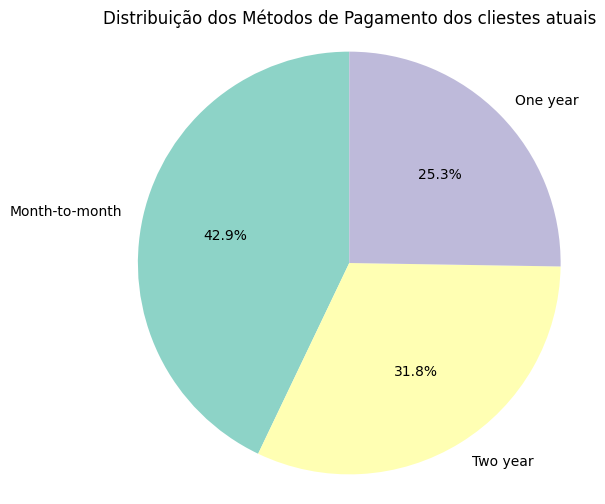

In [64]:
contagem = clientes_atuais['account.Contract'].value_counts()
porcentagem = contagem / contagem.sum() * 100

# Gráfico
plt.figure(figsize=(6,6))
plt.pie(
    porcentagem,
    labels=porcentagem.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Set3.colors
)
plt.title('Distribuição dos Métodos de Pagamento dos cliestes atuais')
plt.axis('equal')  # Deixar o gráfico redondo
plt.show()

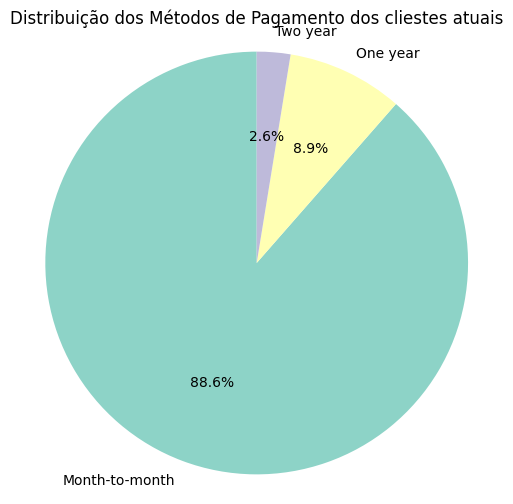

In [65]:
contagemEX = ex_cliente['account.Contract'].value_counts()
porcentagemEX = contagemEX / contagemEX.sum() * 100

# Gráfico
plt.figure(figsize=(6,6))
plt.pie(
    porcentagemEX,
    labels=porcentagemEX.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Set3.colors
)
plt.title('Distribuição dos Métodos de Pagamento dos cliestes atuais')
plt.axis('equal')  # Deixar o gráfico redondo
plt.show()

**PAGAMENTO MENSAL**:em media os clientes q evadirão gastarão em media 74 reais por mes de contrato, JA OS Q N SAIRÃO em media os clientes q evadirão gastarão em media 61 reais por mes de contrato,

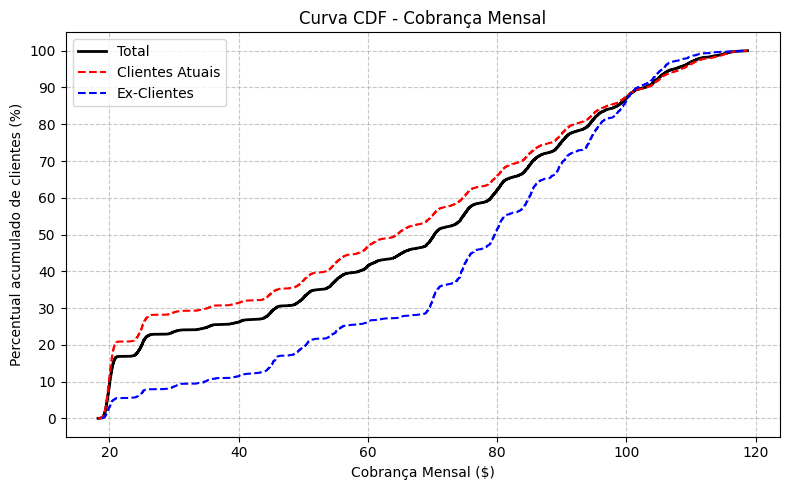

In [66]:
# Dados principais
dados_total = df['account.Charges.Monthly']
dados_clientes_atuais = clientes_atuais['account.Charges.Monthly']
dados_ex_cliente = ex_cliente['account.Charges.Monthly']

# Função para calcular CDF (%)
def calcula_cdf(dados):
    valores = np.sort(dados)
    cdf = np.arange(1, len(valores)+1) / len(valores) * 100
    return valores, cdf

# Calcular CDFs
x_total, y_total = calcula_cdf(dados_total)
x_atual, y_atual = calcula_cdf(dados_clientes_atuais)
x_ex, y_ex = calcula_cdf(dados_ex_cliente)

# Plot
plt.figure(figsize=(8,5))
plt.plot(x_total, y_total, label='Total', color='black', linewidth=2)
plt.plot(x_atual, y_atual, label='Clientes Atuais', color='red', linestyle='--')
plt.plot(x_ex, y_ex, label='Ex-Clientes', color='blue', linestyle='--')

plt.xlabel('Cobrança Mensal ($)')
plt.ylabel('Percentual acumulado de clientes (%)')
plt.title('Curva CDF - Cobrança Mensal')
plt.yticks(np.arange(0, 110, 10))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**PAGAMENTO TOTAL**: OS CLIENTES Q EVADIRÃO GASTARÃO MUITO MENOS DO QUE OS QUE FICARÃO COMO PODEMOS VER NOS GRAFICOS ABAIXO, EM Media os clientes q evadirão gastarão em media 1531 reais no tempo total de contrato,ENQUANTO OS em media os clientes q evadirão gastarão em media 2555 reais no tempo total de contrato,

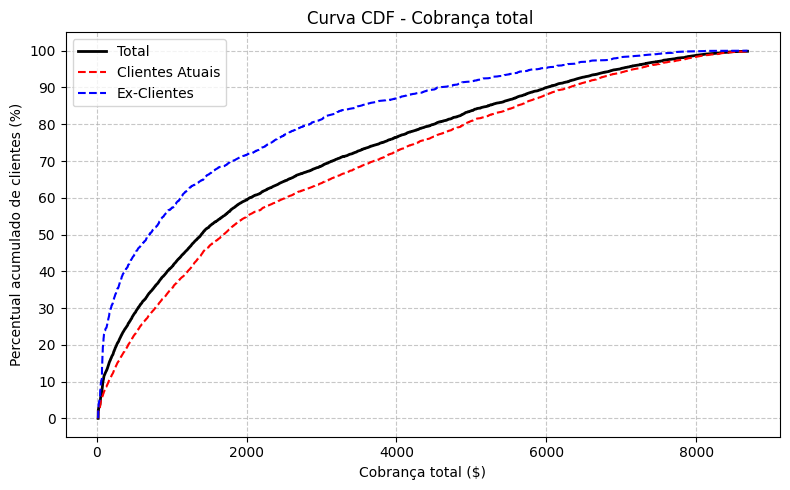

In [67]:
# Dados principais
dados_total_Total = df['account.Charges.Total']
dados_clientes_atuais_Total = clientes_atuais['account.Charges.Total']
dados_ex_cliente_Total = ex_cliente['account.Charges.Total']

# Função para calcular CDF (%)
def calcula_cdf(dados):
    valores = np.sort(dados)
    cdf = np.arange(1, len(valores)+1) / len(valores) * 100
    return valores, cdf

# Calcular CDFs
x_total, y_total = calcula_cdf(dados_total_Total)
x_atual, y_atual = calcula_cdf(dados_clientes_atuais_Total)
x_ex, y_ex = calcula_cdf(dados_ex_cliente_Total)

# Plot
plt.figure(figsize=(8,5))
plt.plot(x_total, y_total, label='Total', color='black', linewidth=2)
plt.plot(x_atual, y_atual, label='Clientes Atuais', color='red', linestyle='--')
plt.plot(x_ex, y_ex, label='Ex-Clientes', color='blue', linestyle='--')

plt.xlabel('Cobrança total ($)')
plt.ylabel('Percentual acumulado de clientes (%)')
plt.title('Curva CDF - Cobrança total ')
plt.yticks(np.arange(0, 110, 10))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**PAGAMENTO DIARIO**:

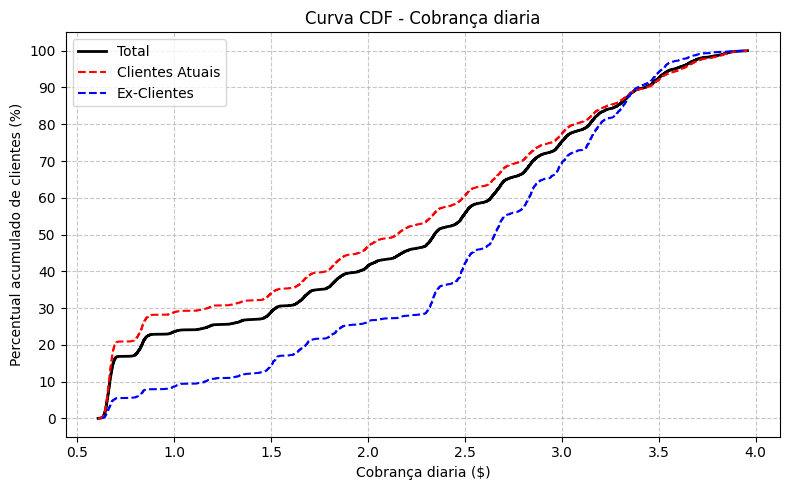

In [68]:
# Dados principais
dados_total_diary = df['account.Charges.diary']
dados_clientes_atuais_diary = clientes_atuais['account.Charges.diary']
dados_ex_cliente_diary = ex_cliente['account.Charges.diary']

# Função para calcular CDF (%)
def calcula_cdf(dados):
    valores = np.sort(dados)
    cdf = np.arange(1, len(valores)+1) / len(valores) * 100
    return valores, cdf

# Calcular CDFs
x_total, y_total = calcula_cdf(dados_total_diary)
x_atual, y_atual = calcula_cdf(dados_clientes_atuais_diary)
x_ex, y_ex = calcula_cdf(dados_ex_cliente_diary)

# Plot
plt.figure(figsize=(8,5))
plt.plot(x_total, y_total, label='Total', color='black', linewidth=2)
plt.plot(x_atual, y_atual, label='Clientes Atuais', color='red', linestyle='--')
plt.plot(x_ex, y_ex, label='Ex-Clientes', color='blue', linestyle='--')

plt.xlabel('Cobrança diaria ($)')
plt.ylabel('Percentual acumulado de clientes (%)')
plt.title('Curva CDF - Cobrança diaria')
plt.yticks(np.arange(0, 110, 10))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# RELATORIO FINAL
#Introdução
O presente relatório detalha a análise realizada sobre o conjunto de dados da "TelecomX_Data", com o objetivo principal de compreender os fatores que levam à evasão de clientes, fenômeno conhecido como Churn. A análise busca identificar e comparar os perfis de clientes que cancelam o serviço com os que permanecem fiéis, a fim de gerar insights que possam fundamentar a criação de estratégias proativas para a retenção de clientes e a redução da taxa de Churn.
#Limpeza e Tratamento de Dados
**Para viabilizar a análise, foram executados os seguintes passos no tratamento dos dados**:
* Importação e Normalização: Os dados foram importados de um arquivo JSON. A estrutura aninhada do arquivo foi normalizada, expandindo as colunas para um formato tabular, resultando em um DataFrame com 7267 registros.
**Conversão de Tipos** :
1. A coluna account.Charges.Total foi convertida para o tipo numérico, e valores não numéricos foram tratados como nulos (NaN). A verificação dos dados revelou que esta coluna possuía 11 entradas nulas em um total de 7267 registros.
2. A coluna customer.tenure foi convertida para o tipo inteiro.
* **Engenharia de Atributos**: Foi criada a coluna account.Charges.diary para representar o custo diário, calculada a partir da divisão da cobrança mensal (account.Charges.Monthly) por 30.
* **Codificação de Variáveis Categóricas**: Colunas com respostas binárias (ex: 'Yes'/'No') foram convertidas para valores numéricos (1/0). Variáveis com três categorias, como as de serviços de internet, foram codificadas como 0, 1 e 2.
* **Segmentação de Dados**: O DataFrame principal foi dividido em dois subconjuntos para análise comparativa: ex_cliente, contendo 1869 clientes que evadiram (Churn=1), e clientes_atuais, com 5174 clientes que permaneceram (Churn=0).

#Análise Exploratória de Dados
A análise foi focada na comparação entre os perfis dos clientes que evadiram e os que permaneceram.
1. Perfil do Cliente que Evadiu
* Contrato: Uma esmagadora maioria de 88,6% dos clientes que saíram possuíam um contrato do tipo "Month-to-month" (Mensal).
* Tempo de Contrato (Tenure): Tinham um tempo de permanência significativamente menor, com uma média de aproximadamente 18 meses. 75% deles tinham até 29 meses de contrato.
* Perfil Pessoal: A maioria não possuía parceiro(a) (64% solteiros) e não tinha dependentes (
86%).
* Serviços Adicionais: A maioria dos que evadiram não possuía serviços de valor agregado, como Segurança Online (78% não tinham) e Suporte Técnico (77% não tinham).
* Serviço de Internet: 70% utilizavam o serviço "Fiber optic" (Fibra Óptica).
* Cobranças: Apresentavam uma cobrança mensal média mais alta (R$ 74,44) e uma cobrança total média de 1531 reais.
* Método de Pagamento: 57% utilizavam "Electronic check" (Cheque Eletrônico).


2. Perfil do Cliente Fiel (Atual)
* Contrato: Apresentam uma distribuição de contratos muito mais equilibrada. Embora o plano mensal ainda seja o maior com 42,9%, uma parcela expressiva possui contratos de "Two year" (31,8%) e "One year" (25,3%).
* Tempo de Contrato (Tenure): São clientes de longa data, com um tempo médio de permanência de 37,5 meses, mais que o dobro do grupo que evadiu.
* Perfil Pessoal: A distribuição entre solteiros e casados é bem equilibrada , assim como a de gênero. A maioria também não possui dependentes (65%), mas em uma proporção menor que o grupo de churn.
* Serviços Adicionais: O consumo de serviços adicionais como Suporte Técnico , Proteção de Dispositivo e Backup Online é notavelmente
 equilibrado, indicando que estes clientes contratam mais serviços agregados.
* Cobranças: Possuem uma cobrança mensal média menor (R$ 61,27) , porém, devido ao maior tempo de casa, a cobrança total média é muito superior, chegando a 2555 reais
* Método de Pagamento: A preferência é distribuída de forma quase idêntica entre os quatro métodos de pagamento disponíveis, sem destaque para nenhum.

#Visualizações Comparativas
Somente no pdf, as imagems podem ser vista no decorrer do codigo

#Conclusões e Insights

A análise comparativa permite traçar perfis distintos. O cliente fiel é caracterizado pela longevidade, preferência por contratos de longo prazo, um consumo equilibrado de serviços adicionais e uma cobrança mensal mais moderada.
Em contrapartida, o cliente com alto risco de evasão é um cliente recente, com contrato mensal flexível, que paga um valor mensal mais alto (impulsionado pela fibra óptica), mas que não contrata serviços agregados que aumentam a fidelidade (como segurança e suporte). A baixa barreira de saída do contrato mensal, combinada a um alto custo sem o valor percebido de "extras", o torna um alvo fácil para a concorrência.

#Recomendações
Com base nos insights gerados, sugerem-se as seguintes ações para transformar clientes de risco em clientes fiéis:


1.  **Incentivar Contratos de Longo Prazo**: Criar ofertas agressivas para migrar clientes do plano mensal para contratos anuais ou bianuais, oferecendo descontos ou benefícios para replicar o comportamento dos clientes fiéis.

2.   **Desenvolver Pacotes de Serviços (Bundles)**: Para clientes de fibra óptica, oferecer pacotes que incluam Segurança Online, Suporte Técnico e Backup a um preço atrativo, aumentando o valor percebido e a dificuldade de troca de provedor.
3.   **Implementar um Programa de Retenção Proativo**: Utilizar os dados para identificar clientes com perfil de risco (baixo tempo de contrato, plano mensal, sem serviços adicionais) e abordá-los com ofertas de fidelização perso**nalizadas.
4.   Otimizar Formas de Pagamento**: Incentivar a adesão a métodos de pagamento automáticos (cartão de crédito e débito em conta), que são mais comuns entre clientes fiéis, oferecendo um pequeno desconto como estímulo.
5.  ** Ações de Onboarding e Engajamento Inicial**: Desenvolver uma jornada de boas-vindas para novos clientes, focada em demonstrar o valor dos serviços nos primeiros meses, período mais crítico para a evasão.


